In [1]:
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt
import numpy as np

import mdgrad
import mdgrad.nn as nn
import mdgrad.optim as optim

In [2]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

In [3]:
X_train, X_test = train_examples.reshape(60000, 28*28), test_examples.reshape(10000, 28*28)
y_train, y_test = train_labels, test_labels

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 512)
        self.act1 = nn.Tanh()
        self.l2 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = self.act1(self.l1(x))
        x = self.l2(x)
        return x

In [5]:
lr = 3e-4

model = Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [6]:
def accuracy(y_pred, y_true):
    return mdgrad.sum(y_pred == y_true)[0] / len(y_pred)

In [7]:
losses, accs = [], []

for i in range(100):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    acc = accuracy(mdgrad.argmax(y_pred, axis=1), y_train)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.numpy())
    accs.append(acc)
    if (i+1) % 10 == 0 or i == 0: 
        print(f'Epoch: {i+1}\tLoss: {loss.numpy():.4f}\tAccuracy: {acc:.4f}')

Epoch: 1	Loss: 2.7069	Accuracy: 0.1271
Epoch: 10	Loss: 1.3697	Accuracy: 0.5000
Epoch: 20	Loss: 1.0263	Accuracy: 0.6292
Epoch: 30	Loss: 0.8100	Accuracy: 0.7198
Epoch: 40	Loss: 0.6908	Accuracy: 0.7739
Epoch: 50	Loss: 0.6357	Accuracy: 0.8005
Epoch: 60	Loss: 0.5959	Accuracy: 0.8222
Epoch: 70	Loss: 0.5682	Accuracy: 0.8383
Epoch: 80	Loss: 0.5531	Accuracy: 0.8497
Epoch: 90	Loss: 0.5451	Accuracy: 0.8588
Epoch: 100	Loss: 0.5413	Accuracy: 0.8666


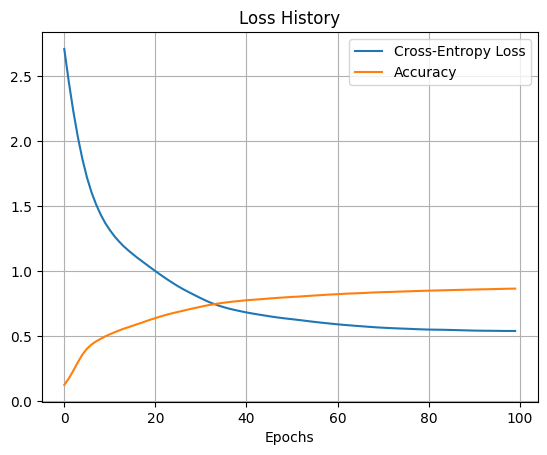

In [8]:
plt.plot(losses, label='Cross-Entropy Loss')
plt.plot(accs, label='Accuracy')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [9]:
preds = model(X_test)
preds = mdgrad.argmax(preds, axis=1)
test_acc =  accuracy(preds, y_test)
print(f'Test Set Accuracy: {100*test_acc:.2f}%')

Test Set Accuracy: 86.87%


Text(0.5, 1.0, 'Predicted Label: 7')

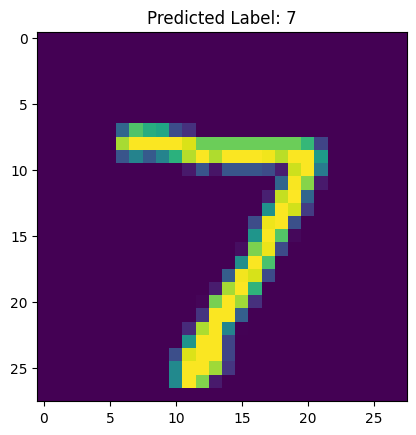

In [10]:
prediction = int(mdgrad.argmax(model(X_test[0]), axis=1)[0])
plt.imshow(X_test[0].reshape(28, 28))
plt.title(f'Predicted Label: {prediction}')